# Sprint 8

#### Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [2]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='sprint4',
                                         user='root',
                                         password='root')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  8.0.39
You're connected to database:  ('sprint4',)
MySQL connection is closed


In [3]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

connection = mysql.connector.connect(host='localhost',
                                        database='sprint4',
                                        user='root',
                                        password='root')

cursor = connection.cursor()
cursor.execute("SHOW TABLES")
table_list = cursor.fetchall()
for i in table_list:
    globals()[i[0]] = pd.read_sql(f"select * from {i[0]}", connection)
    

C:\Users\Pau\AppData\Local\Temp\ipykernel_16668\4171305306.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  globals()[i[0]] = pd.read_sql(f"select * from {i[0]}", connection)


Exercici 1

- Una variable numèrica.

Text(0.5, 1.0, 'Precios')

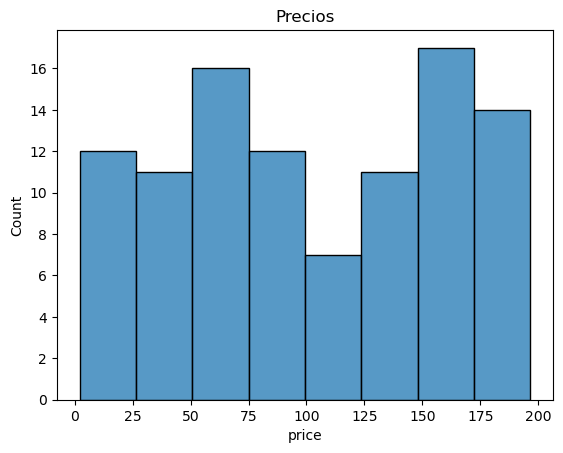

In [4]:
sns.histplot(data=products, x='price').set_title("Precios")

Podemos observar que gran parte de los productos tienen un precio entre 50 y 75 y entre 150 y 175, seguidos por 175-200

Exercici 2
- Dues variables numèriques.

Text(0.5, 1.0, 'Precios')

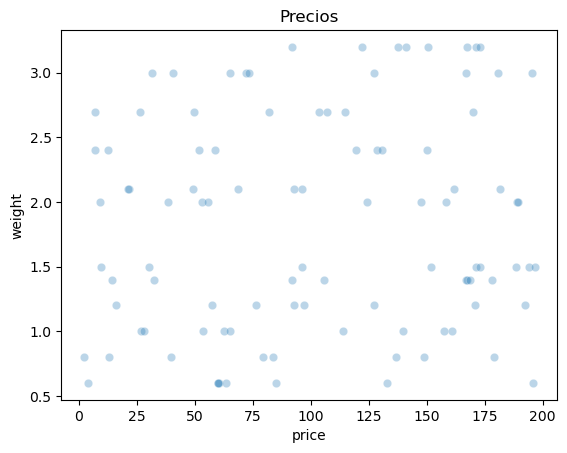

In [5]:
sns.scatterplot(data=products, x='price', y='weight', alpha=0.3).set_title("Precios")

No hay relación aparente entre el peso y el precio de un producto, aunque se puede observar una falta de productos de peso entre 1.5 y 2

Exercici 3
- Una variable categòrica.

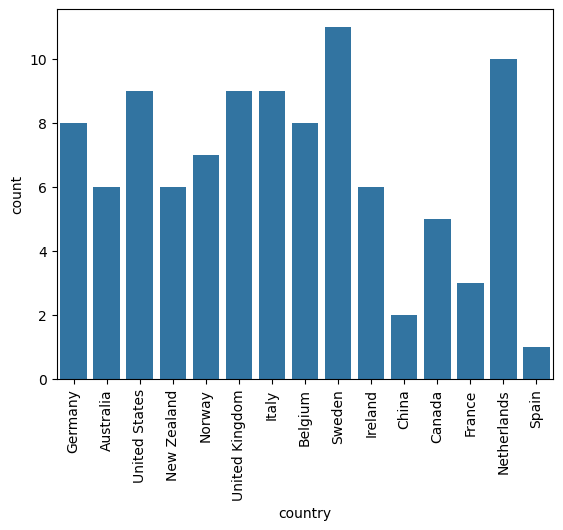

In [20]:
sns.countplot(data=company, x='country') #utilizar countplot en lugar de displot
plt.xticks(rotation=90)
plt.show()

El país con más compañías es Sweden, seguido de cerca por Netherlands

Exercici 4
- Una variable categòrica i una numèrica.

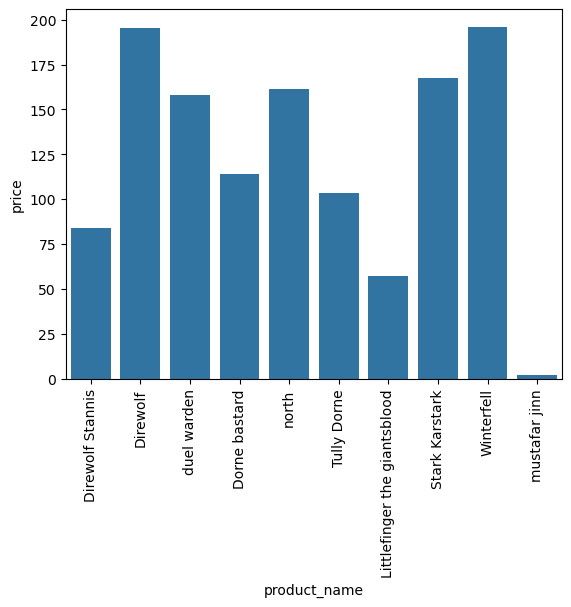

In [21]:
sns.barplot(products.value_counts().reset_index()[:11], y='price', x='product_name', errorbar=None)
plt.xticks(rotation=90)
plt.show()

De los 10 productos mostrados, los más caros son Direwolf y Winterfell mientras que el más barato es Mustafar Jinn

Exercici 5
- Dues variables categòriques.

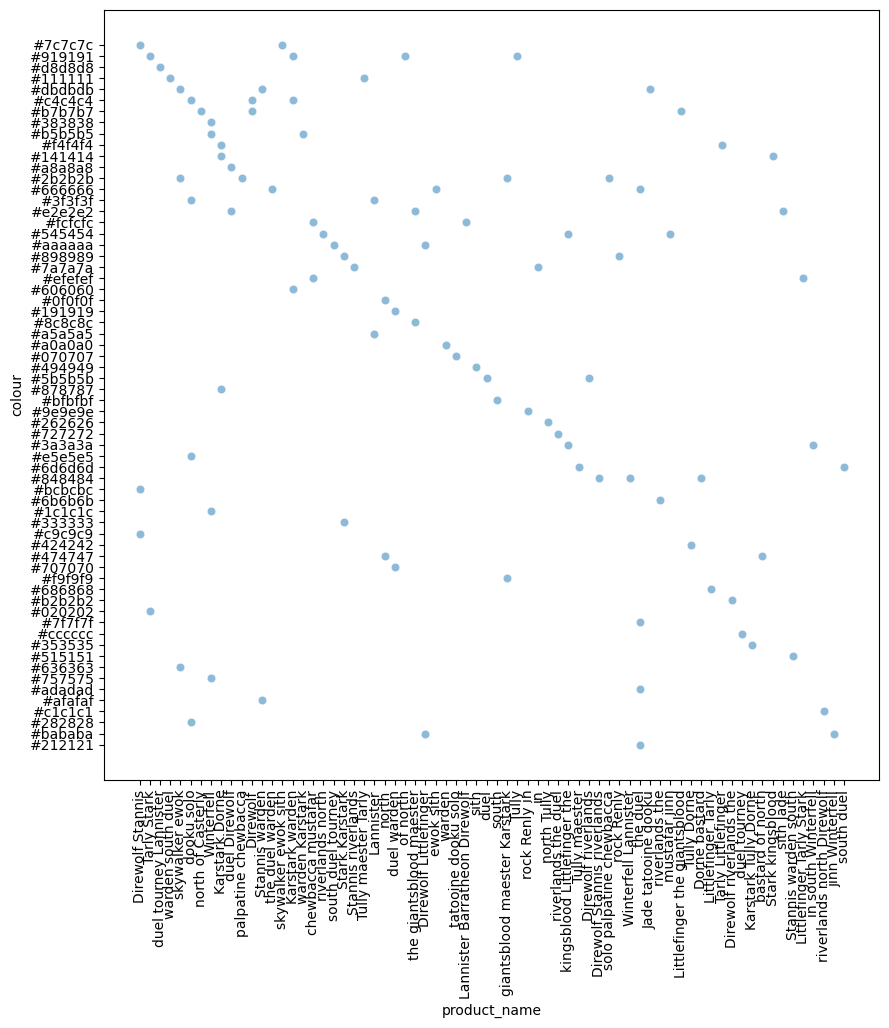

In [8]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=products, y='colour', x='product_name', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

Podemos observar que hay una marcada relación entre el nombre del producto y su color, aunque también hay algunas desviaciones pronunciadas

Exercici 6
- Tres variables.

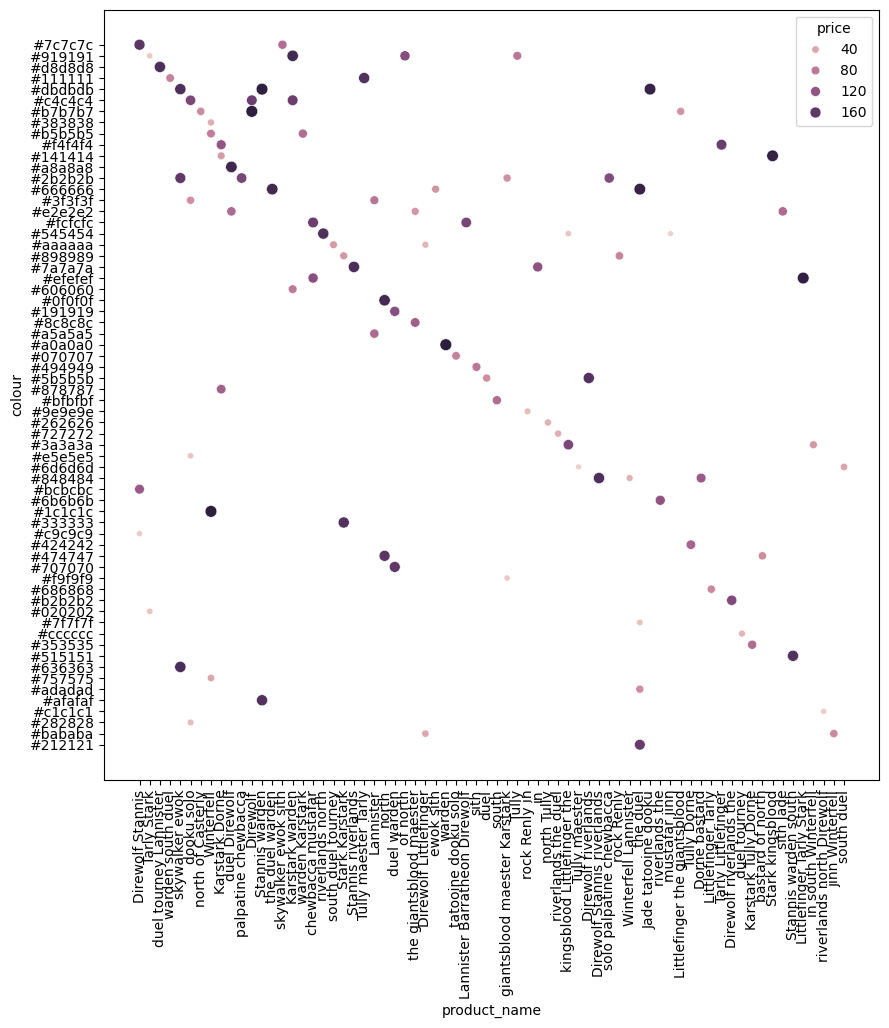

In [9]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=products, x='product_name', y='colour', size='price', hue='price')
plt.xticks(rotation=90)
plt.show()

Pero, a diferencia de la relación entre nombre y color, el precio no sigue una patrón reconocible

<Axes: xlabel='month'>

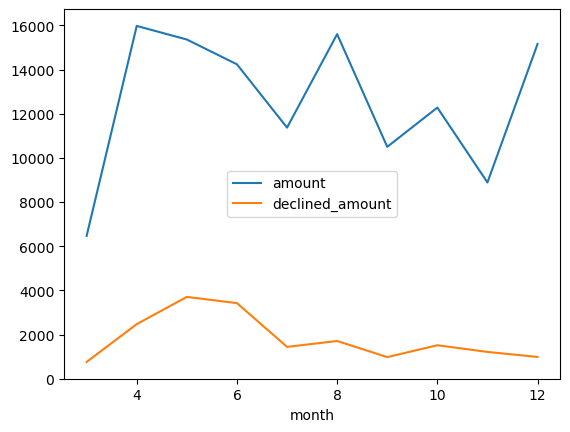

In [10]:
year_2021 = transaction[transaction['timestamp'].dt.year == 2021].copy()
year_2021["month"] = year_2021['timestamp'].dt.month

year_2021["declined_amount"] = 0.0
year_2021.loc[year_2021["declined"] == 1, "declined_amount"] = year_2021["amount"]

year_2021.groupby('month')[['amount', 'declined_amount']].sum().plot.line()

Este fue añadido para probar pero lo dejé por si necesito hacer uso de lo aprendido en el futuro

Exercici 7
- Graficar un Pairplot.

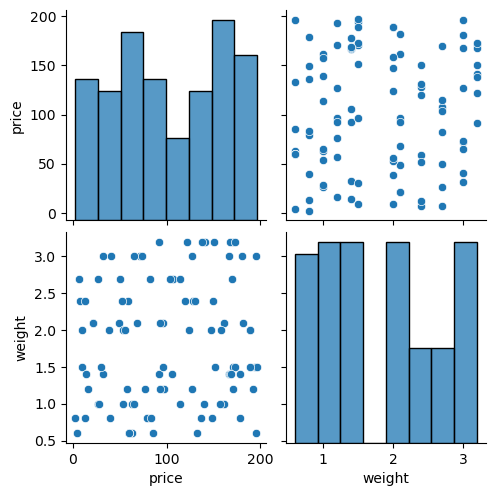

In [11]:
sns.pairplot(data=products[["price", "weight"]])

Como se ha visto anteriormente, no hay relación aparente entre el precio y el peso

#### Nivell 2

Exercici 1
- Correlació de totes les variables numèriques.

<Axes: >

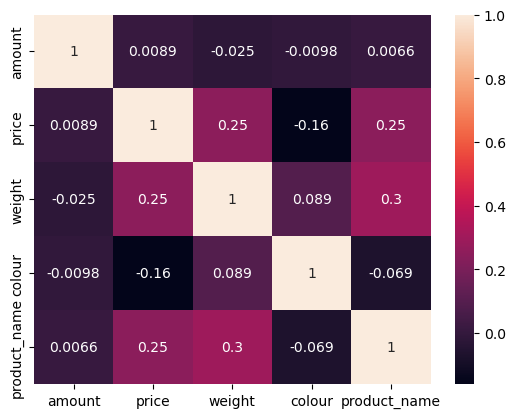

In [12]:
df_all = pd.merge(transaction, transaction_product, how='left', left_on='id', right_on='transaction_id')
df_all = pd.merge(df_all, products, how='left', left_on='product_id', right_on='id')

le = LabelEncoder()
df_all["colour"] = le.fit_transform(df_all['colour']) #Asigno una etiqueta a cada uno de los colores
df_all["product_name"] = le.fit_transform(df_all['product_name'])


sns.heatmap(df_all[["amount", "price", "weight", "colour", "product_name"]].corr(method='spearman'), annot=True) #He añadido las variables colour y product_name a pesar de que sean categóricas, simplemente para ver el resultado. Las numéricas serían solamente price, amount y weight

He añadido las variables colour y product_name a pesar de que sean categóricas, simplemente para ver el resultado. Las numéricas serían solamente price, amount y weight, que se puede ver que no tienen correlación

In [13]:
# df_all = transaction
# df_all = pd.merge(df_all, data_users, how='outer', left_on='user_id', right_on='id')
# df_all = pd.merge(df_all, credit_card, how='outer', left_on='card_id', right_on='id')
# df_all = pd.merge(df_all, active_cards, how='outer', left_on='id', right_on='card_id')
# df_all = pd.merge(df_all, company, how='outer', left_on='business_id', right_on='company_id')
# df_all = pd.merge(df_all, transaction_product, how='outer', left_on='id', right_on='transaction_id')
# df_all = pd.merge(df_all, products, how='outer', left_on='product_id', right_on='id', suffixes=('_x1', '_x2'))

# df_all.isnull().sum()

# df_all.drop(["id_y", "id_x2", "user_id", "cvv", "product_id", "year", "active", "declined"], axis=1, inplace=True)

# df_all.select_dtypes(include='number').corr()#.plot.bar()
# df_all[["amount", "price", "weight"]].corr(method='spearman').plot.bar()

Exercici 2
- Implementa un jointplot.

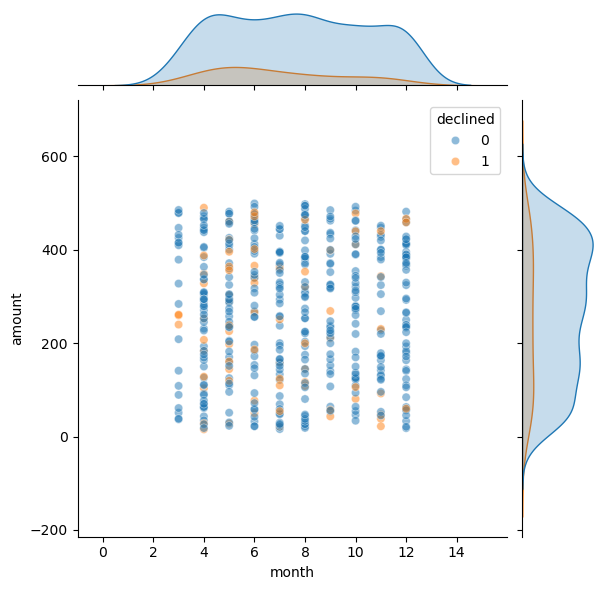

In [18]:
# year_2021.groupby(["month"])[["amount"]].mean().plot.jointplot()
# sns.jointplot(year_2021.groupby(["month"])[["amount"]].mean())
sns.jointplot(data=year_2021, x='month', y='amount', hue='declined', kind='scatter', alpha=0.5)
plt.show()

Se puede apreciar una tendencia a la baja en las transacciones declinadas en el tiempo, así como tres leves picos de transacciones aceptadas en los meses de Abril, Agosto y Diciembre

#### Nivell 3

Exercici 1
- Implementa un violinplot combinat amb un altre tipus de gràfic.

<Axes: xlabel='year', ylabel='amount'>

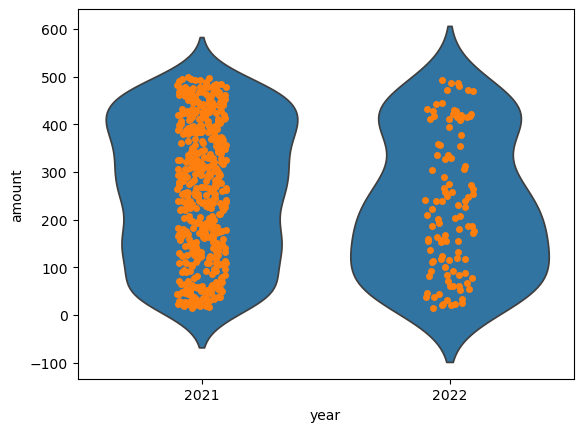

In [19]:
transaction["year"] = transaction["timestamp"].dt.year
n3e1 = sns.violinplot(data=transaction, x="year", y="amount", inner=None)
n3e1 = sns.stripplot(data=transaction, x='year', y='amount')
# n3e1 = sns.kdeplot(data=transaction, x='year', y='amount')

n3e1

En 2021 vemos una mayor cantidad de transacciones alrededor de los >300, mientras que 2022 se centra en las <200

Exercici 2
- Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

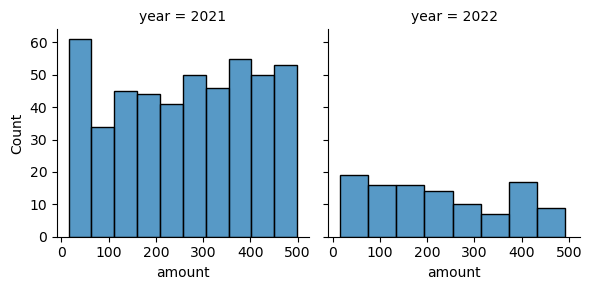

In [16]:
sns.FacetGrid(data=transaction, col="year").map(sns.histplot, "amount")

El año 2021 vemos una cantidad elevada de transacciones por valor menor de 100, aunque, después de una bajada importante de las de 100, tienden a la alta otra vez hasta los 500. En 2022, en cambio, tienden más a la baja con un pico en los 400